# Combining Base Python and Pandas

The base Python topics we covered in the previous notebook are common in other fields, but in social science most coding uses Pandas features. That said, having a knowledge of the base Python features are useful in combination with Pandas. That is what we cover in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, we will load our `nytraffic` module. We are using the autoreload functionality in Jupyter to automatically reload the module when we make changes in Visual Studio Code. Otherwise, we would have to restart the kernel and reload the data each time we changed the code.

In [2]:
%load_ext autoreload
%autoreload 2
%aimport nytraffic

We will once again use the NY street data we used for the first activity. Instead of a long list of cells that have to be copied between notebooks, loading data is now a single function call.

In [3]:
data = nytraffic.load_data("../data/Traffic_Volume_Counts.csv", "../data/Traffic_Borough.csv")

Next, we want to add a total column. This might be something we want to do in a lot of notebooks, so we've moved it to a function as well.

In [4]:
data["total"] = nytraffic.compute_total_traffic(data)

Now, we can make a histogram. I am increasing the number of bins to get a more granular histogram.

(array([4.447e+03, 8.964e+03, 8.937e+03, 6.067e+03, 3.893e+03, 2.304e+03,
        1.545e+03, 9.840e+02, 7.860e+02, 6.250e+02, 5.700e+02, 4.240e+02,
        3.320e+02, 2.690e+02, 2.280e+02, 2.200e+02, 1.690e+02, 1.520e+02,
        1.150e+02, 9.800e+01, 1.210e+02, 9.300e+01, 9.400e+01, 7.000e+01,
        6.900e+01, 9.000e+01, 8.400e+01, 8.000e+01, 7.400e+01, 7.900e+01,
        9.500e+01, 7.900e+01, 7.000e+01, 1.120e+02, 7.500e+01, 7.700e+01,
        5.400e+01, 3.300e+01, 3.700e+01, 1.800e+01, 2.000e+01, 1.900e+01,
        9.000e+00, 1.300e+01, 1.800e+01, 1.400e+01, 7.000e+00, 8.000e+00,
        6.000e+00, 9.000e+00]),
 array([     0.  ,   2224.08,   4448.16,   6672.24,   8896.32,  11120.4 ,
         13344.48,  15568.56,  17792.64,  20016.72,  22240.8 ,  24464.88,
         26688.96,  28913.04,  31137.12,  33361.2 ,  35585.28,  37809.36,
         40033.44,  42257.52,  44481.6 ,  46705.68,  48929.76,  51153.84,
         53377.92,  55602.  ,  57826.08,  60050.16,  62274.24,  64498.32,
      

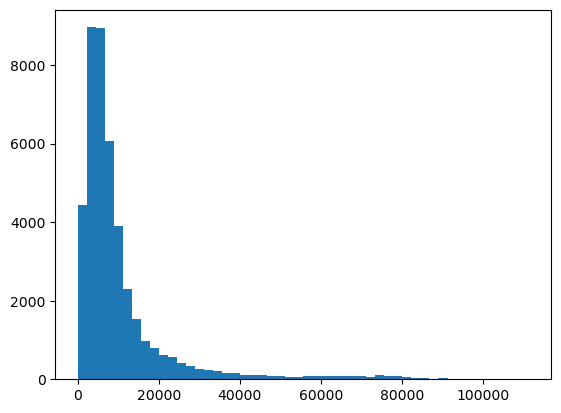

In [5]:
plt.hist(data.total, bins=50)

Next, we create `am_total` and `pm_total` columns, and plot both of them. We use the same partial day total function for both, with a different argument.

In [6]:
data["am_total"] = nytraffic.partial_day_traffic(data, "AM")

In [7]:
data["pm_total"] = nytraffic.partial_day_traffic(data, "PM")

(array([2.0750e+04, 1.2251e+04, 3.7680e+03, 1.7040e+03, 1.1270e+03,
        6.9800e+02, 4.7000e+02, 3.5000e+02, 2.4600e+02, 2.1700e+02,
        1.7700e+02, 1.8000e+02, 1.9300e+02, 1.6500e+02, 1.5400e+02,
        1.0500e+02, 6.0000e+01, 3.5000e+01, 4.5000e+01, 2.8000e+01,
        1.2000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([    0.  ,  2051.04,  4102.08,  6153.12,  8204.16, 10255.2 ,
        12306.24, 14357.28, 16408.32, 18459.36, 20510.4 , 22561.44,
        24612.48, 26663.52, 28714.56, 30765.6 , 32816.64, 34867.68,
        36918.72, 38969.76, 41020.8 , 43071.84, 45122.88, 47173.92,
        49224.96, 51276.  ]),
 <BarContainer object of 25 artists>)

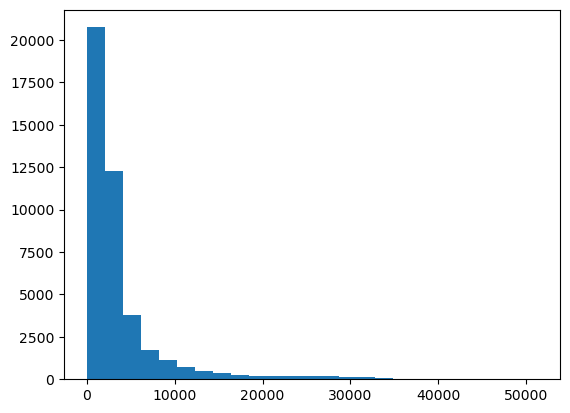

In [8]:
plt.hist(data.am_total, bins=25)

(array([1.4781e+04, 1.5303e+04, 5.6040e+03, 2.2910e+03, 1.3380e+03,
        7.4100e+02, 5.2900e+02, 3.3600e+02, 2.5900e+02, 2.1700e+02,
        2.1700e+02, 1.8700e+02, 1.8700e+02, 1.8200e+02, 1.8100e+02,
        1.7300e+02, 1.0400e+02, 4.7000e+01, 3.0000e+01, 2.9000e+01,
        1.5000e+01, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([    0. ,  3187.4,  6374.8,  9562.2, 12749.6, 15937. , 19124.4,
        22311.8, 25499.2, 28686.6, 31874. , 35061.4, 38248.8, 41436.2,
        44623.6, 47811. , 50998.4, 54185.8, 57373.2, 60560.6, 63748. ,
        66935.4, 70122.8, 73310.2, 76497.6, 79685. ]),
 <BarContainer object of 25 artists>)

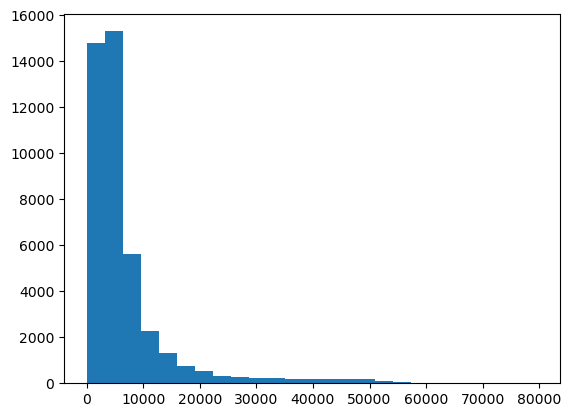

In [9]:
plt.hist(data.pm_total, bins=25)

Many of the streets in this dataset were observed over the course of more than one day. Suppose we are tasked with creating plots that compare daily volumes for several sensors, we might want to average together all the days that a sensor was observed in a particular direction. We can do this with our `time_columns` variable.

In [10]:
mean_daily_traffic = nytraffic.compute_mean_daily_traffic(data)
mean_daily_traffic

12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  3:00-4:00AM  \
SegmentID Direction                                                         
202       SB            305.000000   222.000000   137.000000   138.000000   
646       NB             26.000000    24.000000    19.750000    16.500000   
          SB             30.500000    26.750000    18.250000    16.250000   
1416      NB             67.555556    38.000000    20.666667    18.222222   
          SB             55.888889    33.666667    18.111111    16.555556   
...                            ...          ...          ...          ...   
9014764   NB           1592.222222  1049.111111   798.888889   706.444444   
9017020   SB            286.500000   200.388889   150.055556   137.833333   
9017037   EB            174.222222   111.333333    78.555556    68.000000   
9017039   WB            260.777778   166.888889   125.333333   103.888889   
9017050   SB            359.888889   273.666667   215.333333   176.555556   

                     4:00-5:00AM  5:00-6:00AM  6:00-7:00AM  7:00-8:00AM  \
SegmentID Direction                                                       
202       SB          114.000000   155.000000   283.000000   355.000000   
646       NB           24.750000    69.250000   118.750000   140.750000   
          SB           28.000000    34.500000    75.750000   127.750000   
1416      NB           28.111111    62.444444    93.444444   170.444444   
          SB           24.666667    45.555556   142.555556   264.111111   
...                          ...          ...          ...          ...   
9014764   NB          768.333333  1264.111111  2587.888889  3070.444444   
9017020   SB          155.611111   292.777778   709.055556   906.611111   
9017037   EB          120.777778   329.555556   708.222222   976.666667   
9017039   WB          113.888889   148.888889   259.666667   554.222222   
9017050   SB          187.333333   273.222222   446.333333   653.000000   

                     8:00-9:00AM  9:00-10:00AM  ...  2:00-3:00PM  3:00-4:00PM  \
SegmentID Direction                             ...                             
202       SB          485.000000    549.000000  ...   665.000000   649.000000   
646       NB          187.000000    219.250000  ...   257.000000   276.750000   
          SB          178.500000    203.750000  ...   270.250000   311.000000   
1416      NB          222.000000    201.222222  ...   382.222222   367.888889   
          SB          270.444444    235.444444  ...   323.444444   329.888889   
...                          ...           ...  ...          ...          ...   
9014764   NB         3149.333333   3156.777778  ...  3573.555556  3420.555556   
9017020   SB          829.111111    796.944444  ...   985.666667   960.722222   
9017037   EB          934.555556    893.111111  ...   806.444444   777.777778   
9017039   WB          823.666667    807.333333  ...  1080.888889  1470.666667   
9017050   SB          702.666667    671.888889  ...   745.222222   759.333333   

                     4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  7:00-8:00PM  \
SegmentID Direction                                                       
202       SB          671.000000   700.000000   658.000000   646.000000   
646       NB          262.000000   203.500000   163.250000   138.000000   
          SB          319.500000   248.250000   202.750000   167.250000   
1416      NB          374.555556   383.555556   352.666667   287.777778   
          SB          319.222222   322.777778   286.555556   235.777778   
...                          ...          ...          ...          ...   
9014764   NB         3463.888889  3577.111111  3552.111111  3339.333333   
9017020   SB          980.611111   995.277778   981.777778   825.500000   
9017037   EB          786.000000   741.222222   691.222222   602.444444   
9017039   WB         1524.444444  1441.333333  1285.111111  1213.888889   
9017050   SB          787.000000   802.444444   789.888889   696.222222   

             